# Import Libraries and Load Data

In [3]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Connect to PostgreSQL server
import os
from dotenv import load_dotenv
load_dotenv()
from pangres import upsert
from sqlalchemy import text, create_engine

db_username = os.environ.get('db_username')
db_password = os.environ.get('db_password')
db_host = os.environ.get('db_host')
db_port = os.environ.get('db_port')
db_name = os.environ.get('db_name')

def create_db_connection_string(db_username, db_password, db_host, db_port, db_name):
    connection_url = 'postgresql+psycopg2://' + db_username + ':' + db_password + '@' + db_host + ':' + db_port + '/' + db_name
    return connection_url

conn = create_db_connection_string(db_username, db_password, db_host, db_port, db_name)

db_engine = create_engine(conn, pool_recycle = 3600)

# Create DataFrame
with db_engine.connect() as connection:
    df = pd.read_sql(text('select * from soloq.matches'), connection)


# Cleaning Data

In [4]:
# Nulls
df.isna().sum()

# Changing team id from 100 -> blue, 200 -> red
df['teamId'] = df['teamId'].replace({100: 'blue', 200: 'red'})

Weirdly no null values...

# Exploratory Data Analysis

In [123]:
# Describe
df.describe()

,gameDuration,summonerLevel,champExperience,champLevel,kills,deaths,assists,doubleKills,tripleKills,quadraKills,...,totalTimeSpentDead,teambaronKills,teamdragonKills,teamturretKills,teaminhibitorKills,KDA,teamKills,teamAssists,teamDeaths,teamKDA
count,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000,248170.00000,248170.000000,248170.000000,248170.000000,...,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000,248170.000000
mean,1764.120764,314.290434,13403.019019,14.179913,6.054124,6.074497,7.77870,0.561329,0.072906,0.009602,...,175.682057,0.485675,1.991921,5.593746,1.017387,2.487392,30.270621,38.893500,30.372487,12.436958
std,511.753495,222.204604,5184.547778,3.399922,4.822470,3.517034,5.73339,0.968688,0.299009,0.101250,...,122.674752,0.669815,1.435032,3.600700,1.299666,2.431531,13.778270,21.144649,13.790531,8.113204
min,101.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1517.000000,137.000000,10228.000000,13.000000,2.000000,4.000000,4.00000,0.000000,0.000000,0.000000,...,82.000000,0.000000,1.000000,2.000000,0.000000,1.066667,21.000000,23.000000,21.000000,6.491575
50%,1790.000000,273.000000,13400.000000,15.000000,5.000000,6.000000,7.00000,0.000000,0.000000,0.000000,...,160.000000,0.000000,2.000000,6.000000,0.000000,1.875000,31.000000,38.000000,31.000000,10.838194
75%,2071.000000,444.000000,16643.000000,17.000000,9.000000,8.000000,11.00000,1.000000,0.000000,0.000000,...,248.000000,1.000000,3.000000,9.000000,2.000000,3.100000,40.000000,53.000000,40.000000,16.752381
max,3986.000000,2416.000000,43242.000000,18.000000,43.000000,30.000000,53.00000,13.000000,5.000000,3.000000,...,1175.000000,4.000000,7.000000,17.000000,10.000000,42.000000,86.000000,157.000000,86.000000,90.428571


In [124]:
#  Summary Stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248170 entries, 0 to 248169
Data columns (total 92 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   uuid                            248170 non-null  object 
 1   matchId                         248170 non-null  object 
 2   teamId                          248170 non-null  object 
 3   gameDuration                    248170 non-null  int64  
 4   gameVersion                     248170 non-null  object 
 5   summonerName                    248170 non-null  object 
 6   puuid                           248170 non-null  object 
 7   lane                            248170 non-null  object 
 8   role                            248170 non-null  object 
 9   summonerLevel                   248170 non-null  int64  
 10  teamPosition                    248170 non-null  object 
 11  champExperience                 248170 non-null  int64  
 12  champLevel      

In [125]:
# All Columns
df.columns

Index(['uuid', 'matchId', 'teamId', 'gameDuration', 'gameVersion',
       'summonerName', 'puuid', 'lane', 'role', 'summonerLevel',
       'teamPosition', 'champExperience', 'champLevel', 'championName',
       'kills', 'deaths', 'assists', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'largestKillingSpree', 'largestMultiKill',
       'killingSprees', 'firstBloodAssist', 'firstBloodKill', 'unrealKills',
       'totalDamageDealt', 'totalDamageDealtToChampions',
       'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal',
       'trueDamageDealt', 'trueDamageDealtToChampions', 'trueDamageTaken',
       'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'i

In [9]:
# Length of games
df['gameDuration'].describe()

count    199020.000000
mean       1764.797659
std         514.415014
min         101.000000
25%        1518.000000
50%        1791.000000
75%        2073.000000
max        3986.000000
Name: gameDuration, dtype: float64

<Axes: xlabel='gameDuration', ylabel='Count'>

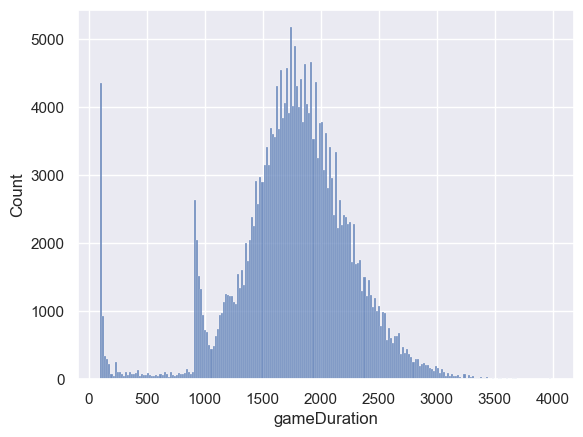

In [120]:
sns.histplot(data = df, x  = 'gameDuration')

Game length follows pretty normal distribution
- First huge peak can be explained by remakes (a player is AFK so you can surrender early)
- Second huge peak can be attriubuted to the ability to surrender the game after 15 minutes has passed
- Most games fall within 25-35 minute range

## Seperating numerical and categorical features

In [11]:
df.describe().columns

Index(['gameDuration', 'summonerLevel', 'champExperience', 'champLevel',
       'kills', 'deaths', 'assists', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'largestKillingSpree', 'largestMultiKill',
       'killingSprees', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorTakedowns', 'inhibitorsLost', 'turretKills',
       'turretTakedowns', 'turretsLost', 'goldEarned', 'goldSpent',
       'neutralMinionsKilled', 'totalMinionsKill

In [12]:
df_num = ['gameDuration', 'champExperience',
       'champLevel', 'kills', 'deaths', 'assists', 'doubleKills',
       'tripleKills', 'quadraKills', 'pentaKills', 'largestKillingSpree',
       'largestMultiKill', 'killingSprees', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorTakedowns', 'inhibitorsLost', 'turretKills',
       'turretTakedowns', 'turretsLost', 'goldEarned', 'goldSpent',
       'neutralMinionsKilled', 'totalMinionsKilled', 'itemsPurchased',
       'detectorWardsPlaced', 'visionScore', 'visionWardsBoughtInGame',
       'wardsKilled', 'wardsPlaced', 'sightWardsBoughtInGame',
       'longestTimeSpentLiving', 'timeCCingOthers', 'timePlayed',
       'totalTimeCCDealt', 'totalTimeSpentDead']
df_cat = ['teamId', 'item0', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'lane', 'role', 'teamPosition', 'championName', 'gameEndedInEarlySurrender', 'gameEndedInSurrender',
       'teamEarlySurrendered', 'summonerLevel', 'win']

# Distribution of Data

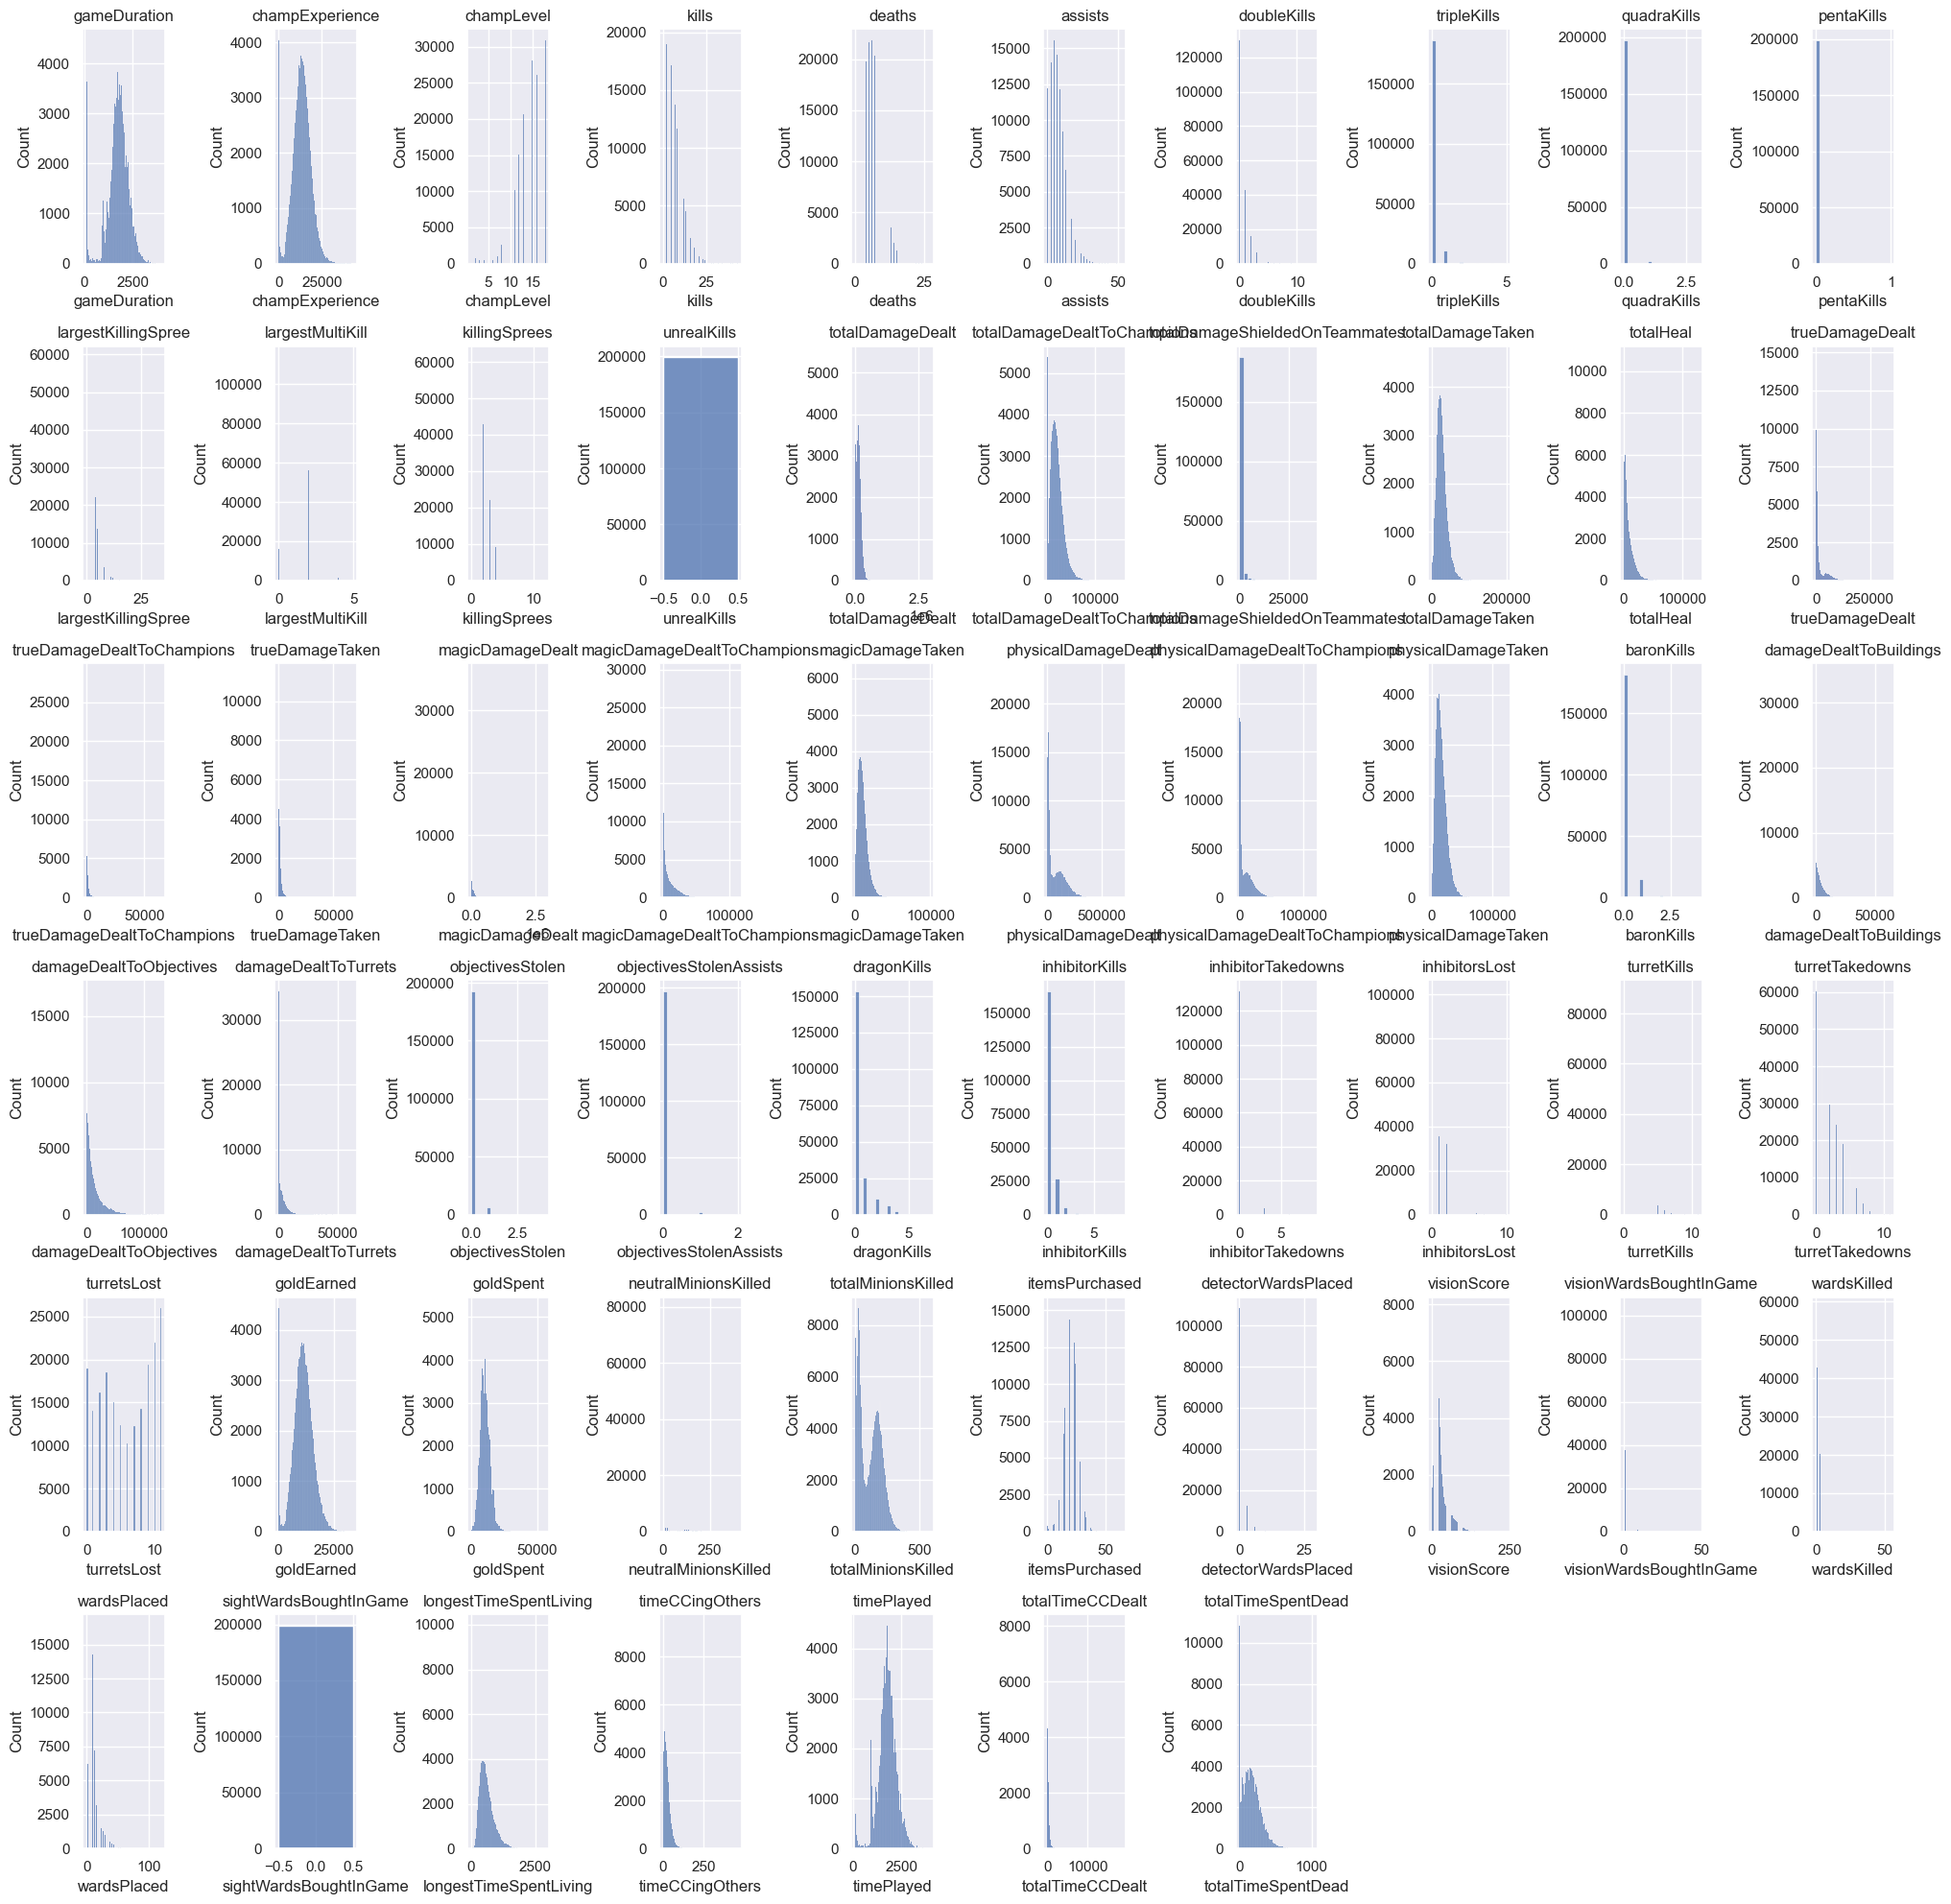

In [14]:
fig, axs = plt.subplots(6, 10, figsize=(20, 20))

axs = axs.flatten()

for i, feature in enumerate(df_num):
    sns.histplot(data = df, x = feature, ax = axs[i])
    axs[i].set_title(feature)

for ax in axs[len(df_num):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Correlations

Kills -> Gold Spent
total dmg to champs -> gold spent 
Gold spent and gold earned are basically the same feature
Game duration and time played are the same feature

Just based on game knowledge, the features I think will most influence a win/loss are:
- KDA
- total dmg to champs
- baron kills
- dragon kills
- turrettakedowns
- goldearned
- inhib kills
- neutral minions killed -> cs
- role? what roles have highest winrate

<Axes: >

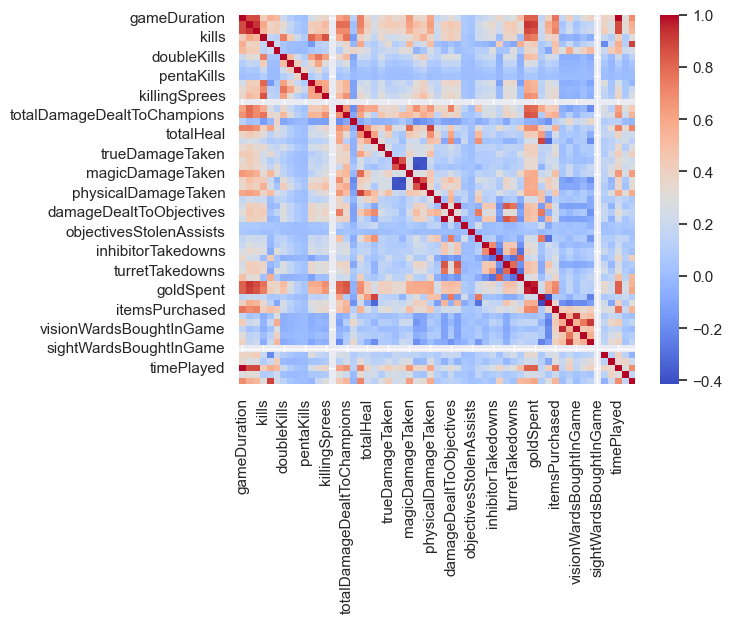

In [15]:
# Heatmap
correlation_matrix = df[df_num].corr()

sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False,)

# Team composition

In [3]:
# Filter Sides
blueside_df = df[df['teamId'] == 'blue']
redside_df = df[df['teamId'] == 'red']

In [18]:
blue_winrate = sum(blueside_df['win'] == True) / (sum(blueside_df['win'] == False) + sum(blueside_df['win'] == True))
blue_winrate

0.49879409104612604

In [19]:
# Winrate by side
red_winrate = sum(redside_df['win'] == True) / (sum(redside_df['win'] == False) + sum(redside_df['win'] == True))
red_winrate

0.501205908953874

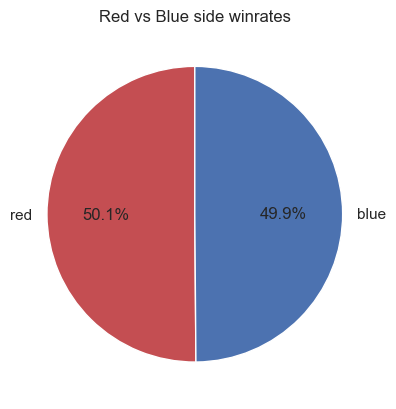

In [20]:
plt.pie([red_winrate, blue_winrate], labels = ['red', 'blue'], colors = ['r', 'b'], startangle = 90, autopct='%1.1f%%')
plt.title('Red vs Blue side winrates')
plt.show()

So red has a slightly higher winrate than blue, which lines up with the general consensus of the community that red always has a slight advantage.

## Champion winrates

In [140]:
winrates = df.groupby('championName')['win'].mean().reset_index()
top_10_winrates = winrates.nlargest(10, 'win')
top_10_winrates

,championName,win
77,Maokai,0.554217
44,Illaoi,0.546988
15,Brand,0.542120
12,Bard,0.538526
70,Lillia,0.537728
65,Kled,0.535070
17,Briar,0.533613
25,DrMundo,0.533133
13,Belveth,0.532549
113,Senna,0.531920


Despite this, I am going to ignore the champion feature as winrates vary by patch as champions are buffed/nerfed. Maokai may have a 55% winrate from this patch, but if he gets nerfed, you bet that win rate is going down. I will be looking for features that are indicative of a win regardless of the patch (focus on fundamentals not meta!)

# Objectives Features

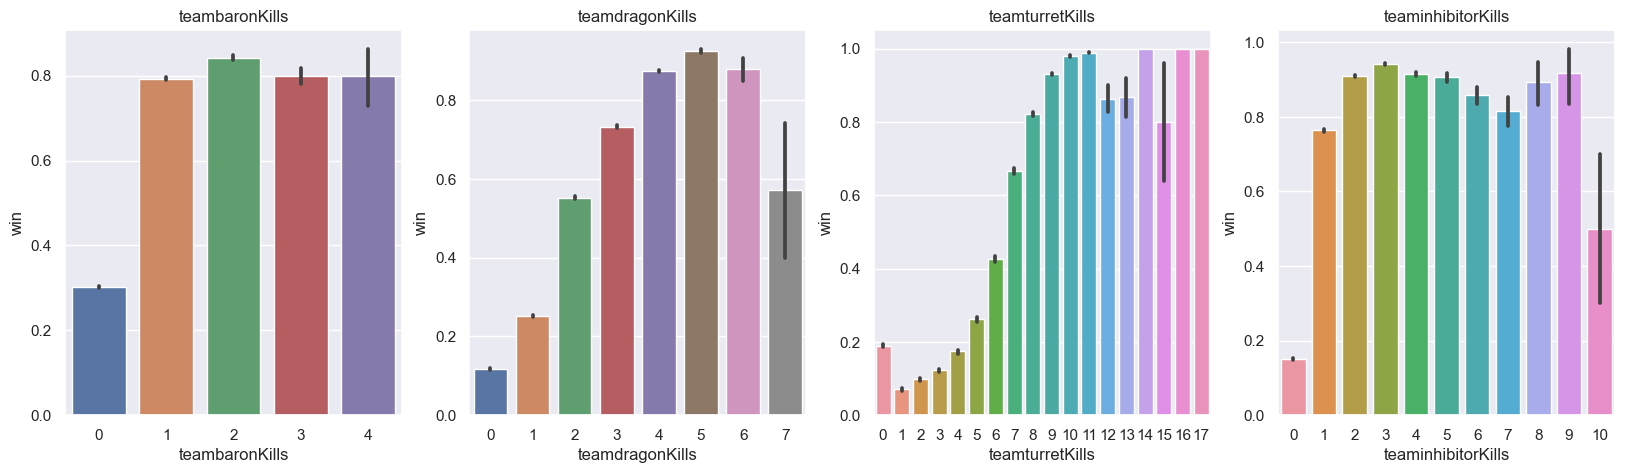

In [5]:
# Changing to team based
# Baron
df['teambaronKills'] = df.groupby(['matchId', 'teamId'])['baronKills'].transform('sum')
# Dragon
df['teamdragonKills'] = df.groupby(['matchId', 'teamId'])['dragonKills'].transform('sum')
# Towers
df['teamturretKills'] = df.groupby(['matchId', 'teamId'])['turretKills'].transform('sum')
# Inhibitors
df['teaminhibitorKills'] = df.groupby(['matchId', 'teamId'])['inhibitorKills'].transform('sum')

objectives = ['teambaronKills', 'teamdragonKills', 'teamturretKills', 'teaminhibitorKills']

fig, axs = plt.subplots(1, len(objectives), figsize=(20, 5))

for i, feature in enumerate(objectives):
    sns.barplot(data = df, x = feature, y = 'win', ax = axs[i])
    axs[i].set_title(feature)

So clearly team objective kills are very important contributors to winning

# KDA

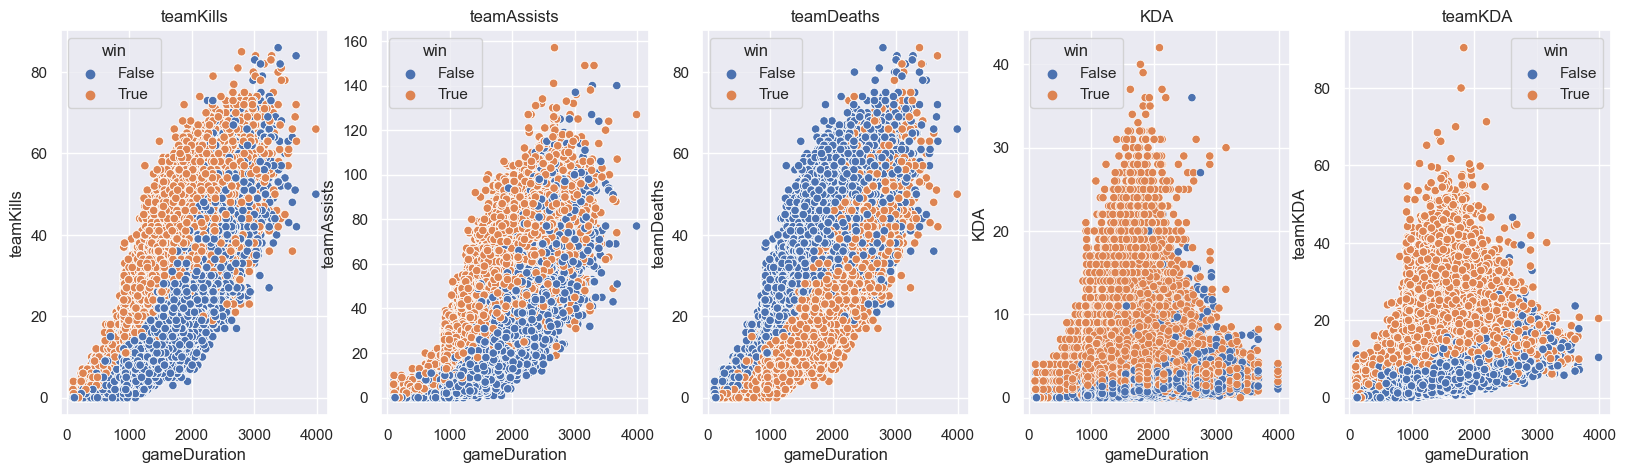

In [6]:
# Individual KDA
df['KDA'] = (df['kills'] + df['assists']) / (df['deaths']+1) # add constant to address perfect kdas
# Kills
df['teamKills'] = df.groupby(['matchId', 'teamId'])['kills'].transform('sum')
# Assists
df['teamAssists'] = df.groupby(['matchId', 'teamId'])['assists'].transform('sum')
# Deaths
df['teamDeaths'] = df.groupby(['matchId', 'teamId'])['deaths'].transform('sum')
# Team KDA
df['teamKDA'] = df.groupby(['matchId', 'teamId'])['KDA'].transform('sum')

kda = ['teamKills', 'teamAssists', 'teamDeaths', 'KDA', 'teamKDA']
fig, axs = plt.subplots(1, len(kda), figsize=(20, 5))

for i, feature in enumerate(kda):
    sns.scatterplot(data = df, x = 'gameDuration', y = feature, hue = 'win', ax = axs[i])
    axs[i].set_title(feature)

## Multi-kills

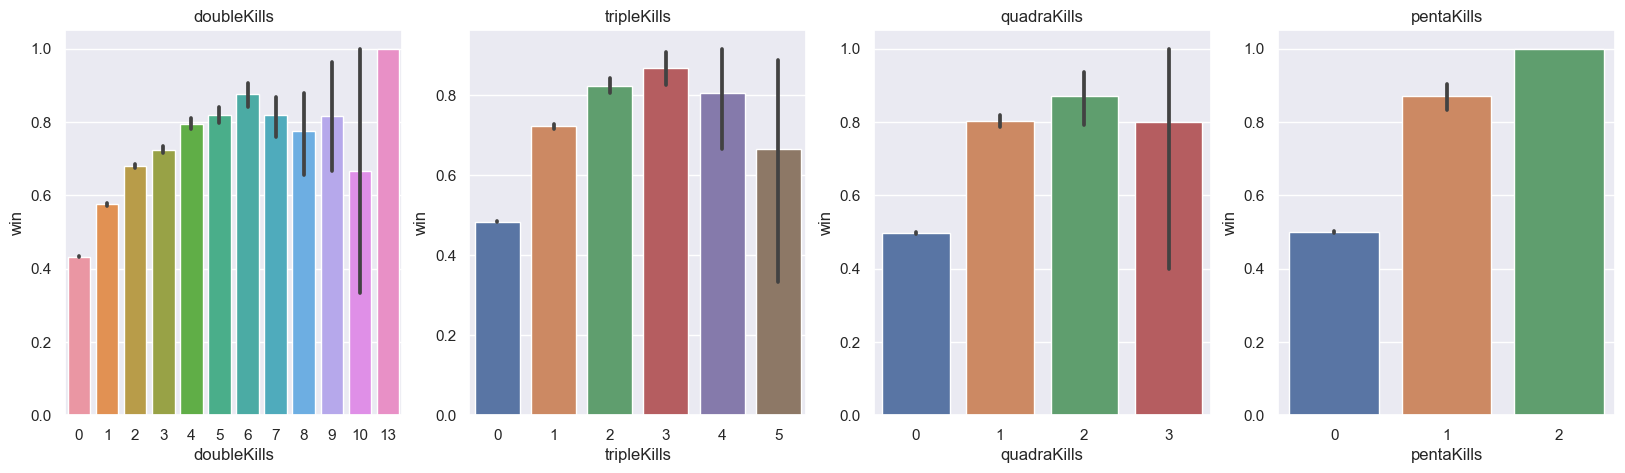

In [7]:
killstreaks = ['doubleKills', 'tripleKills', 'quadraKills', 'pentaKills']
fig, axs = plt.subplots(1, len(killstreaks), figsize=(20, 5))

for i, feature in enumerate(killstreaks):
    sns.barplot(data = df, x = feature, y = 'win', ax = axs[i])
    axs[i].set_title(feature)

# Team Economy

<Axes: xlabel='gameDuration', ylabel='teamGold'>

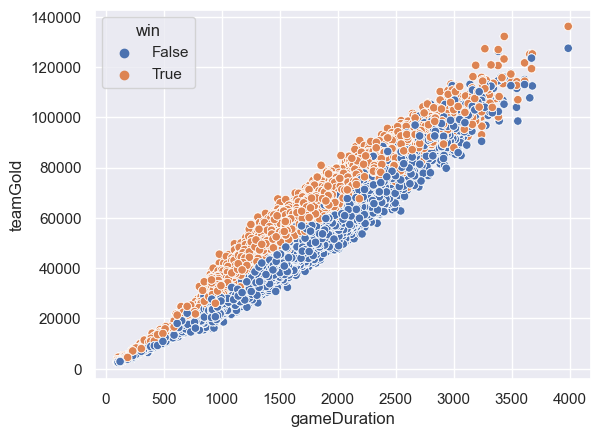

In [8]:

df['teamGold'] = df.groupby(['matchId', 'teamId'])['goldEarned'].transform('sum')
df['teamgoldDifference'] = df['teamGold'][df['teamId'] == 'red'] - df['teamGold'][df['teamId'] == 'blue']

sns.scatterplot(data = df, x = 'gameDuration', y = 'teamGold', hue = 'win')

As the orange dots represent wins, and are almost always above their corresponding blue dots, we can see that generally the team with higher gold wins.

<Axes: xlabel='gameDuration', ylabel='teamCS'>

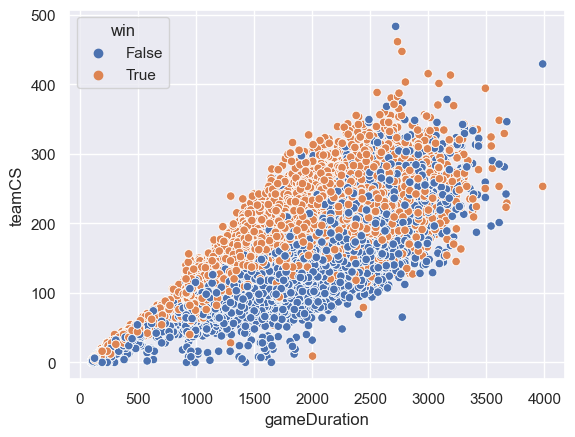

In [9]:
df['teamCS'] = df.groupby(['matchId', 'teamId'])['neutralMinionsKilled'].transform('sum')
sns.scatterplot(data = df, x = 'gameDuration', y = 'teamCS', hue = 'win')

In [110]:
df['role'].value_counts()

role
SOLO       73713
SUPPORT    67866
NONE       53070
CARRY      40540
DUO        12981
Name: count, dtype: int64

In [113]:
df['teamPosition'].value_counts()

teamPosition
JUNGLE     49609
MIDDLE     49600
BOTTOM     49599
TOP        49599
UTILITY    49589
             174
Name: count, dtype: int64

So I actually thought these columns were the same, but it seams they are entirely different. "teamPosition" represents the position you queue up for in ranked, whilst role is what role you fulfilled which is assigned after the game. Because of this, it would be interesting to see the different relationships between individual role and cs with winning.

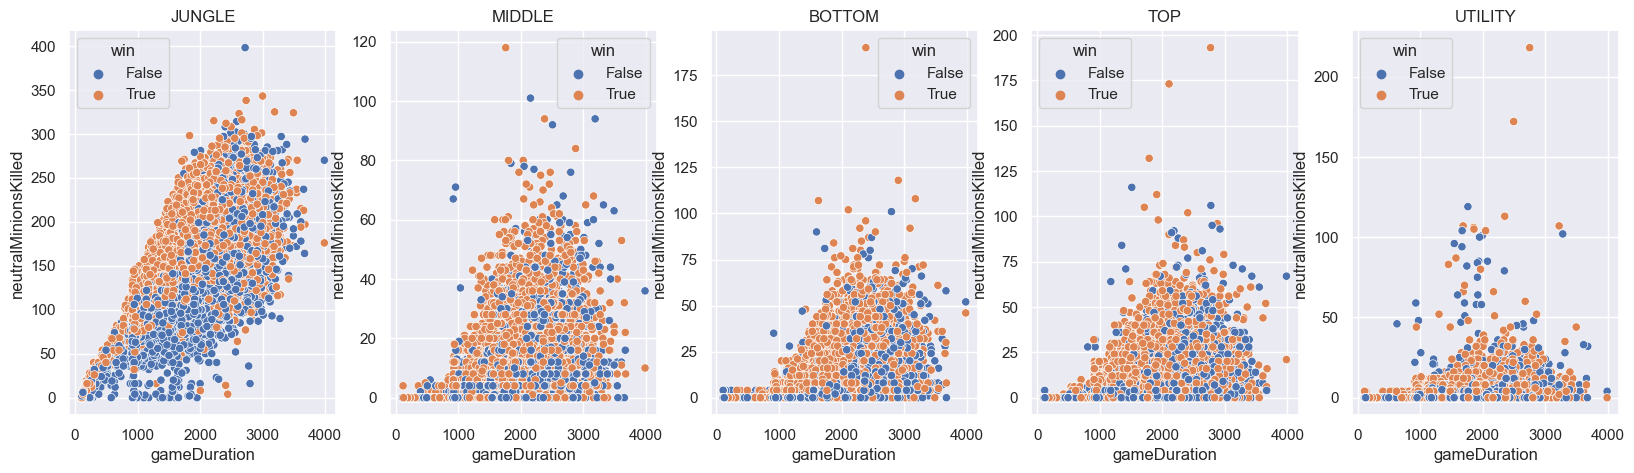

In [118]:
teamPosition = ['JUNGLE', 'MIDDLE', 'BOTTOM', 'TOP', 'UTILITY']

fig, axs = plt.subplots(1, len(teamPosition), figsize=(20, 5))

for i, feature in enumerate(teamPosition):
    sns.scatterplot(data = df[df['teamPosition'] == feature], x = 'gameDuration', y = 'neutralMinionsKilled', hue = 'win', ax = axs[i])
    axs[i].set_title(feature)

<Axes: >

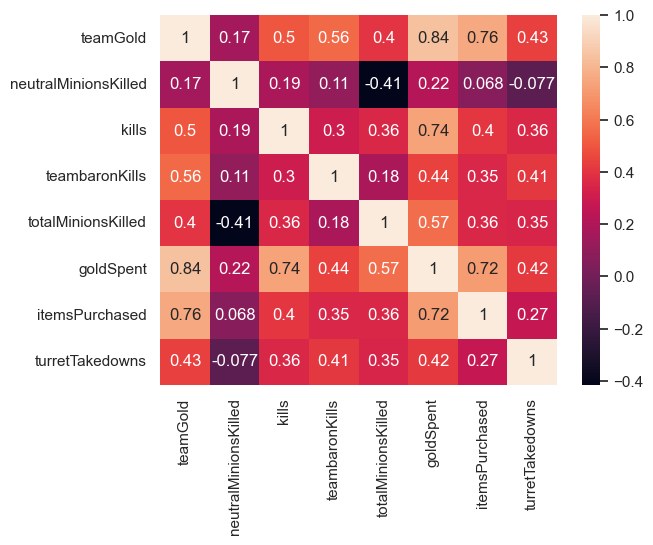

In [27]:
gold_corr = df[['teamGold', 'neutralMinionsKilled', 'kills', 'teambaronKills', 'totalMinionsKilled', 'goldSpent', 'itemsPurchased', 'turretTakedowns']].corr()
sns.heatmap(gold_corr, annot = True)

From this we can see what correlates most with team gold.
- Number of items and gold spent have high correlation with team gold
- kills and baron kills have medium correlations
- Turrets and CS have low correlations with overall gold income which is counter-intuitive to common game knowledge

In [28]:
win_loss_items = df.groupby(['win'])['itemsPurchased'].mean().reset_index()
win_loss_items

,win,itemsPurchased
0,False,19.794292
1,True,19.959311


# Damage stats

<Axes: >

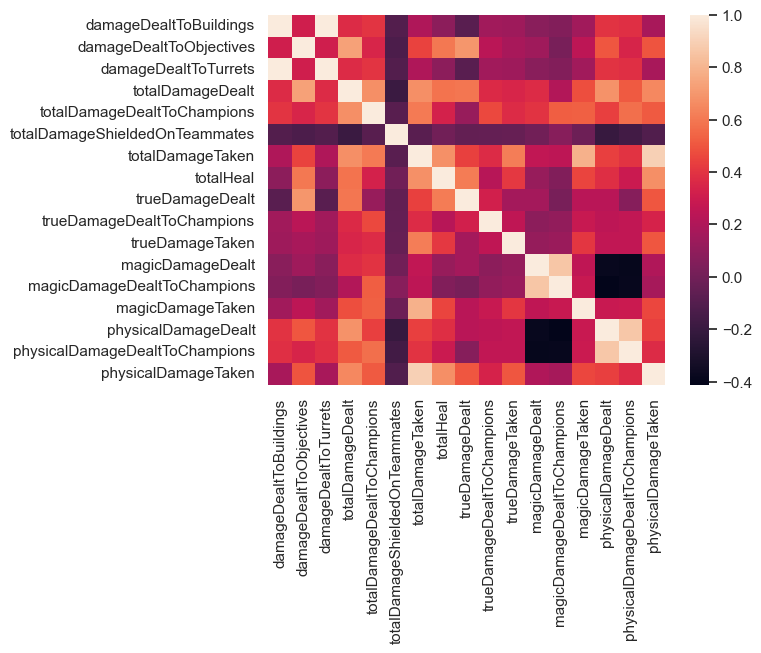

In [30]:
dmg_corr = df[['damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'totalDamageDealt', 'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken']].corr()
sns.heatmap(dmg_corr)

## Is damage condusive to a win??

<Axes: xlabel='gameDuration', ylabel='totalteamDamage'>

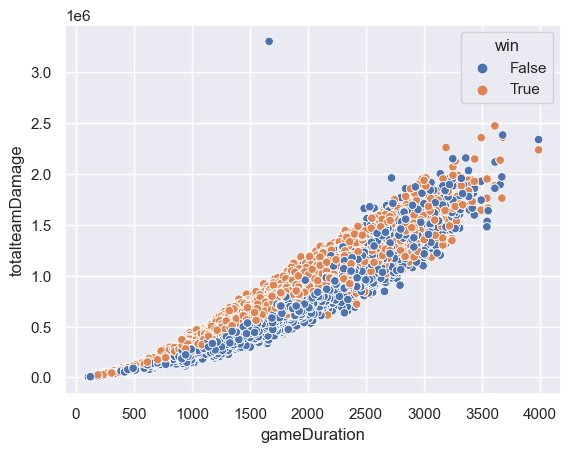

In [10]:
df['totalteamDamage'] = df.groupby(['matchId', 'teamId'])['totalDamageDealt'].transform('sum')
sns.scatterplot(data = df, x = 'gameDuration', y = 'totalteamDamage', hue = 'win')

<Axes: xlabel='gameDuration', ylabel='totalteamHeal'>

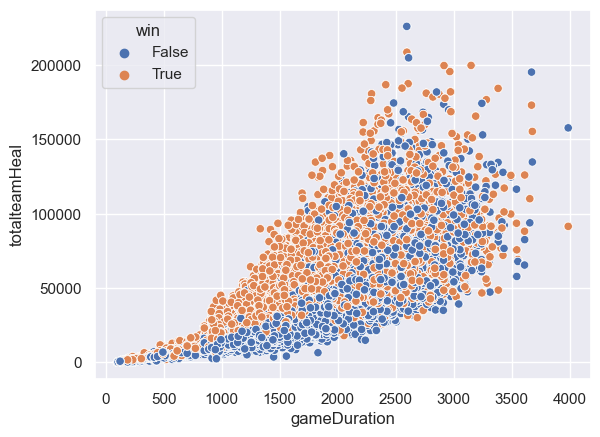

In [11]:
df['totalteamHeal'] = df.groupby(['matchId', 'teamId'])['totalHeal'].transform('sum')
sns.scatterplot(data = df, x = 'gameDuration', y = 'totalteamHeal', hue = 'win')

## Other stats

<Axes: >

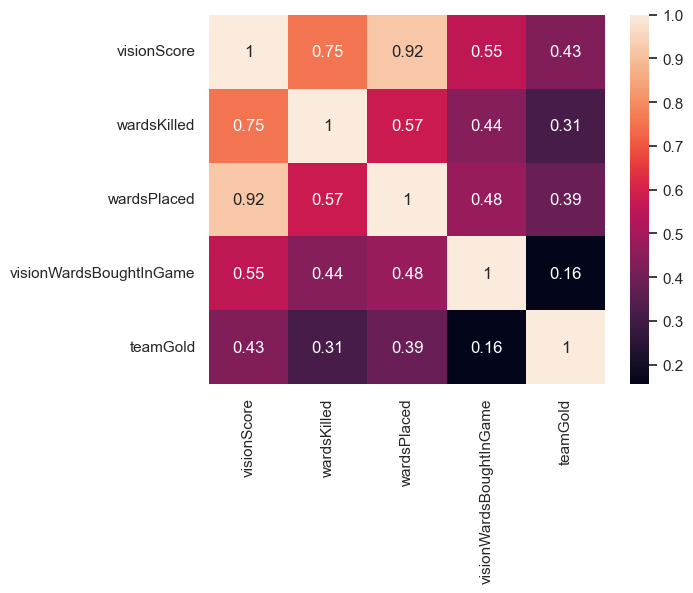

In [31]:
# Vision
vision_corr = df[['visionScore', 'wardsKilled', 'wardsPlaced', 'visionWardsBoughtInGame', 'teamGold']].corr()
sns.heatmap(vision_corr, annot=True)

Vision score has a very high correlation with wards killed and placed and a medium correlation with wards bought. For simplicity sake, I will only use vision score as it is supposed to encapsulate all other three features.

<Axes: xlabel='win', ylabel='visionScore'>

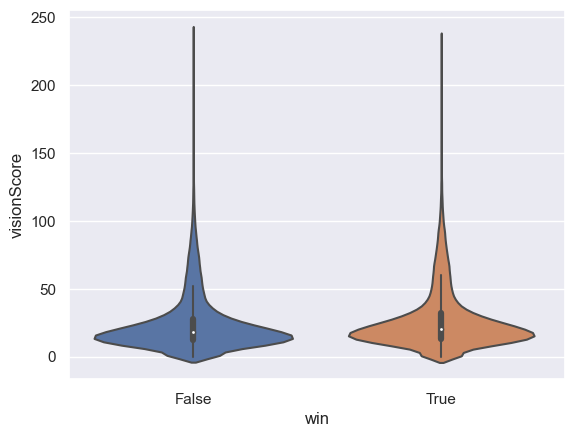

In [32]:
sns.violinplot(data = df, x = 'win', y = 'visionScore')

Seems like all that warding really doesn't make that big of a difference...

<Axes: xlabel='objectivesStolen', ylabel='win'>

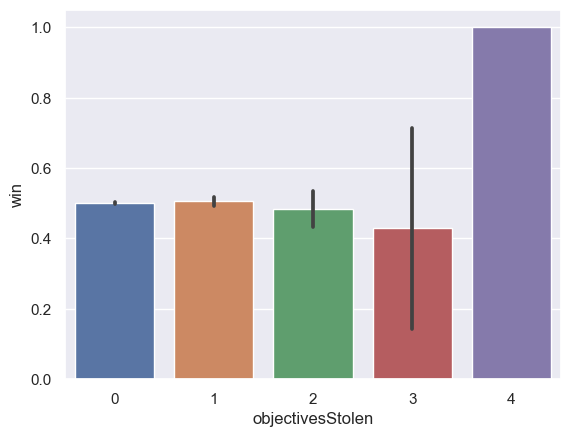

In [33]:
sns.barplot(data = df, x = 'objectivesStolen', y = 'win')

We see that hail mary baron plays aren't actually as impactful as we think (despite feeling like a god if you pull one off in game). Interesting thing to note though is that as more objectives are stolen, the spread of winrates increases greatly suggesting that making these hail mary plays does influence the game...

## Time CCing others

In [129]:
df['totalteamCC'] = df.groupby(['matchId', 'teamId'])['timeCCingOthers'].transform('sum')

<Axes: xlabel='gameDuration', ylabel='totalteamCC'>

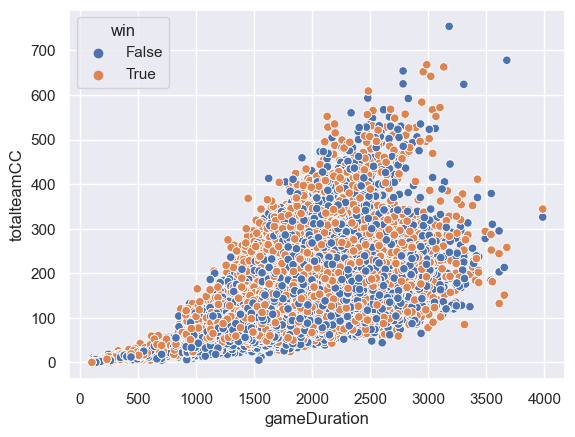

In [45]:
sns.scatterplot(data = df, x = 'gameDuration', y = 'totalteamCC', hue = 'win')

## Summoner Level

<Axes: xlabel='summonerLevel', ylabel='Density'>

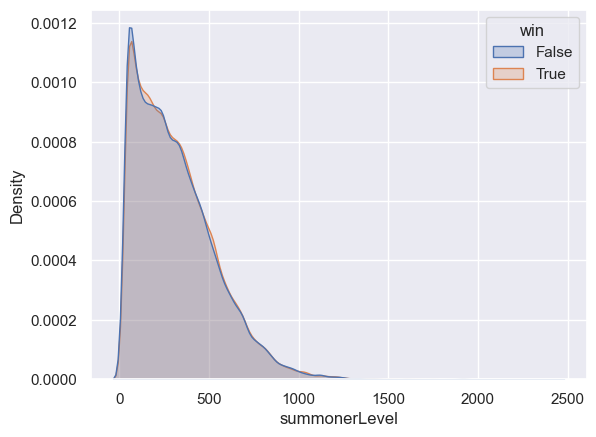

In [135]:
sns.kdeplot(data = df, x = 'summonerLevel', hue = 'win', fill = True)

Distribution of summoner level for both wins and losses seems to be the same, so more experience with the game doesn't seem condusive to winning more...

# Model Building

- Choose relevant columns
- Get dummy data
- Train/test split
- Random forest

In [12]:
# Import features
important_features = [
                    'teambaronKills', 'teamdragonKills',
                    'teamturretKills', 'teaminhibitorKills',
                    'KDA', 'teamKills', 'teamAssists',
                    'teamDeaths', 'teamKDA',
                    'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
                    'teamGold', 'teamCS', 'totalteamDamage', 'totalteamHeal'
                    ]

X = df[important_features]
y = df['win'].astype(int)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

model = RandomForestClassifier(random_state=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [14]:
model.fit(train_X, train_y)
preds = model.predict(val_X)
print(mean_absolute_error(val_y, preds))
print(model.score(train_X, train_y))

0.0007897748335831601
0.9999570185948304


## Accuracy, Precision, Recall, F1 Score

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(val_X)

accuracy = accuracy_score(val_y, y_pred)
precision = precision_score(val_y, y_pred)
recall = recall_score(val_y, y_pred)
f1 = f1_score(val_y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9992102251664169
Precision: 0.9987733230034218
Recall: 0.9996445995282867
F1 Score: 0.9992087713349158
